<a href="https://colab.research.google.com/github/Gunawanworks/machine_learning/blob/main/no_1_butterworth_notch_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img = cv.imread('/content/lena.jpg',0)
img_shape = img.shape
# read image 

In [ ]:
img_freq_doma = np.fft.fft2(img)
print('this is image the array of freq domain ->')
print(img_freq_doma)

# convert spatial domain into frequency domain

this is image the array of freq domain ->
[[ 3.25584420e+07      +0.j         -4.55468851e+05+2391823.01051496j
   1.53695219e+06-1137267.31278729j ... -2.37780285e+05 -635111.17660188j
   1.53695219e+06+1137267.31278729j -4.55468851e+05-2391823.01051496j]
 [-2.89384382e+04-1225777.74145847j -1.59077386e+06+1592406.45389677j
  -1.10652447e+06  +81096.16923336j ...  6.51250340e+05 +812328.36159386j
  -3.56306734e+05 +448718.36945015j  3.66405466e+04 +944236.08344871j]
 [-4.49311818e+05 -164430.6103565j  -2.75677037e+05 -132488.82213991j
   6.66730683e+05 -455291.76973513j ...  3.52412215e+05 +925903.62954245j
  -7.22673120e+05 -174511.30795991j  8.20435954e+05  -63724.63055699j]
 ...
 [ 5.17277644e+05 -213892.50990866j  7.35270789e+05 +708427.16339084j
  -5.25448028e+05 -201098.97219547j ...  9.93534888e+05 +115667.24175333j
   1.34102804e+05 -679229.17173844j -5.71430955e+04 +604366.05906284j]
 [-4.49311818e+05 +164430.6103565j   8.20435954e+05  +63724.63055699j
  -7.22673120e+05 +1745

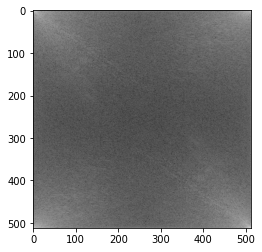

In [ ]:
plt.imshow(np.log1p(np.abs(img_freq_doma)),cmap = 'gray')
plt.show()

# from the result, as we can see the white area shows where the low freq located (corner of the image)


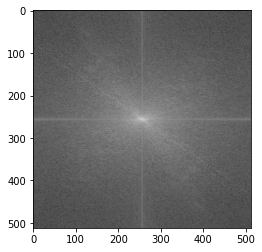

In [ ]:
# we can shift the low freq to the middle area with this code
shift_freq_doma = np.fft.fftshift(img_freq_doma)
plt.imshow(np.log1p(np.abs(shift_freq_doma)),cmap='gray')
plt.show()

In [ ]:
def notch_reject_filter(shape, d0=9, u_k=0, v_k=0):
    P, Q = shape
    # Initialize filter with zeros
    H = np.zeros((P, Q))

    # Traverse through filter
    for u in range(0, P):
        for v in range(0, Q):
            # Get euclidean distance from point D(u,v) to the center
            D_uv = np.sqrt((u - P / 2 + u_k) ** 2 + (v - Q / 2 + v_k) ** 2)
            D_muv = np.sqrt((u - P / 2 - u_k) ** 2 + (v - Q / 2 - v_k) ** 2)

            if D_uv <= d0 or D_muv <= d0:
                H[u, v] = 0.0
            else:
                H[u, v] = 1.0

    return H

In [ ]:
NotchRejectCenter = shift_freq_doma * notch_reject_filter(img_shape, 32, 50, 50)
NotchReject = np.fft.ifftshift(NotchRejectCenter)
inverse_NotchReject = np.fft.ifft2(NotchReject)  # Compute the inverse DFT of the result

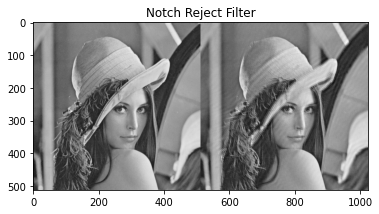

In [ ]:
plot_image = np.concatenate((img, np.abs(inverse_NotchReject)),axis=1)
plt.imshow(plot_image, "gray"), 
plt.title("Notch Reject Filter")
plt.show()